In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df = pd.read_csv('datasets/Admission_Predict_Ver1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.describe()[['CGPA']]

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


In [9]:
df.drop('Serial No.', axis=1, inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
df['Chance of Admit '].mean()

0.72174

In [17]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [18]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [20]:
df.shape

(500, 8)

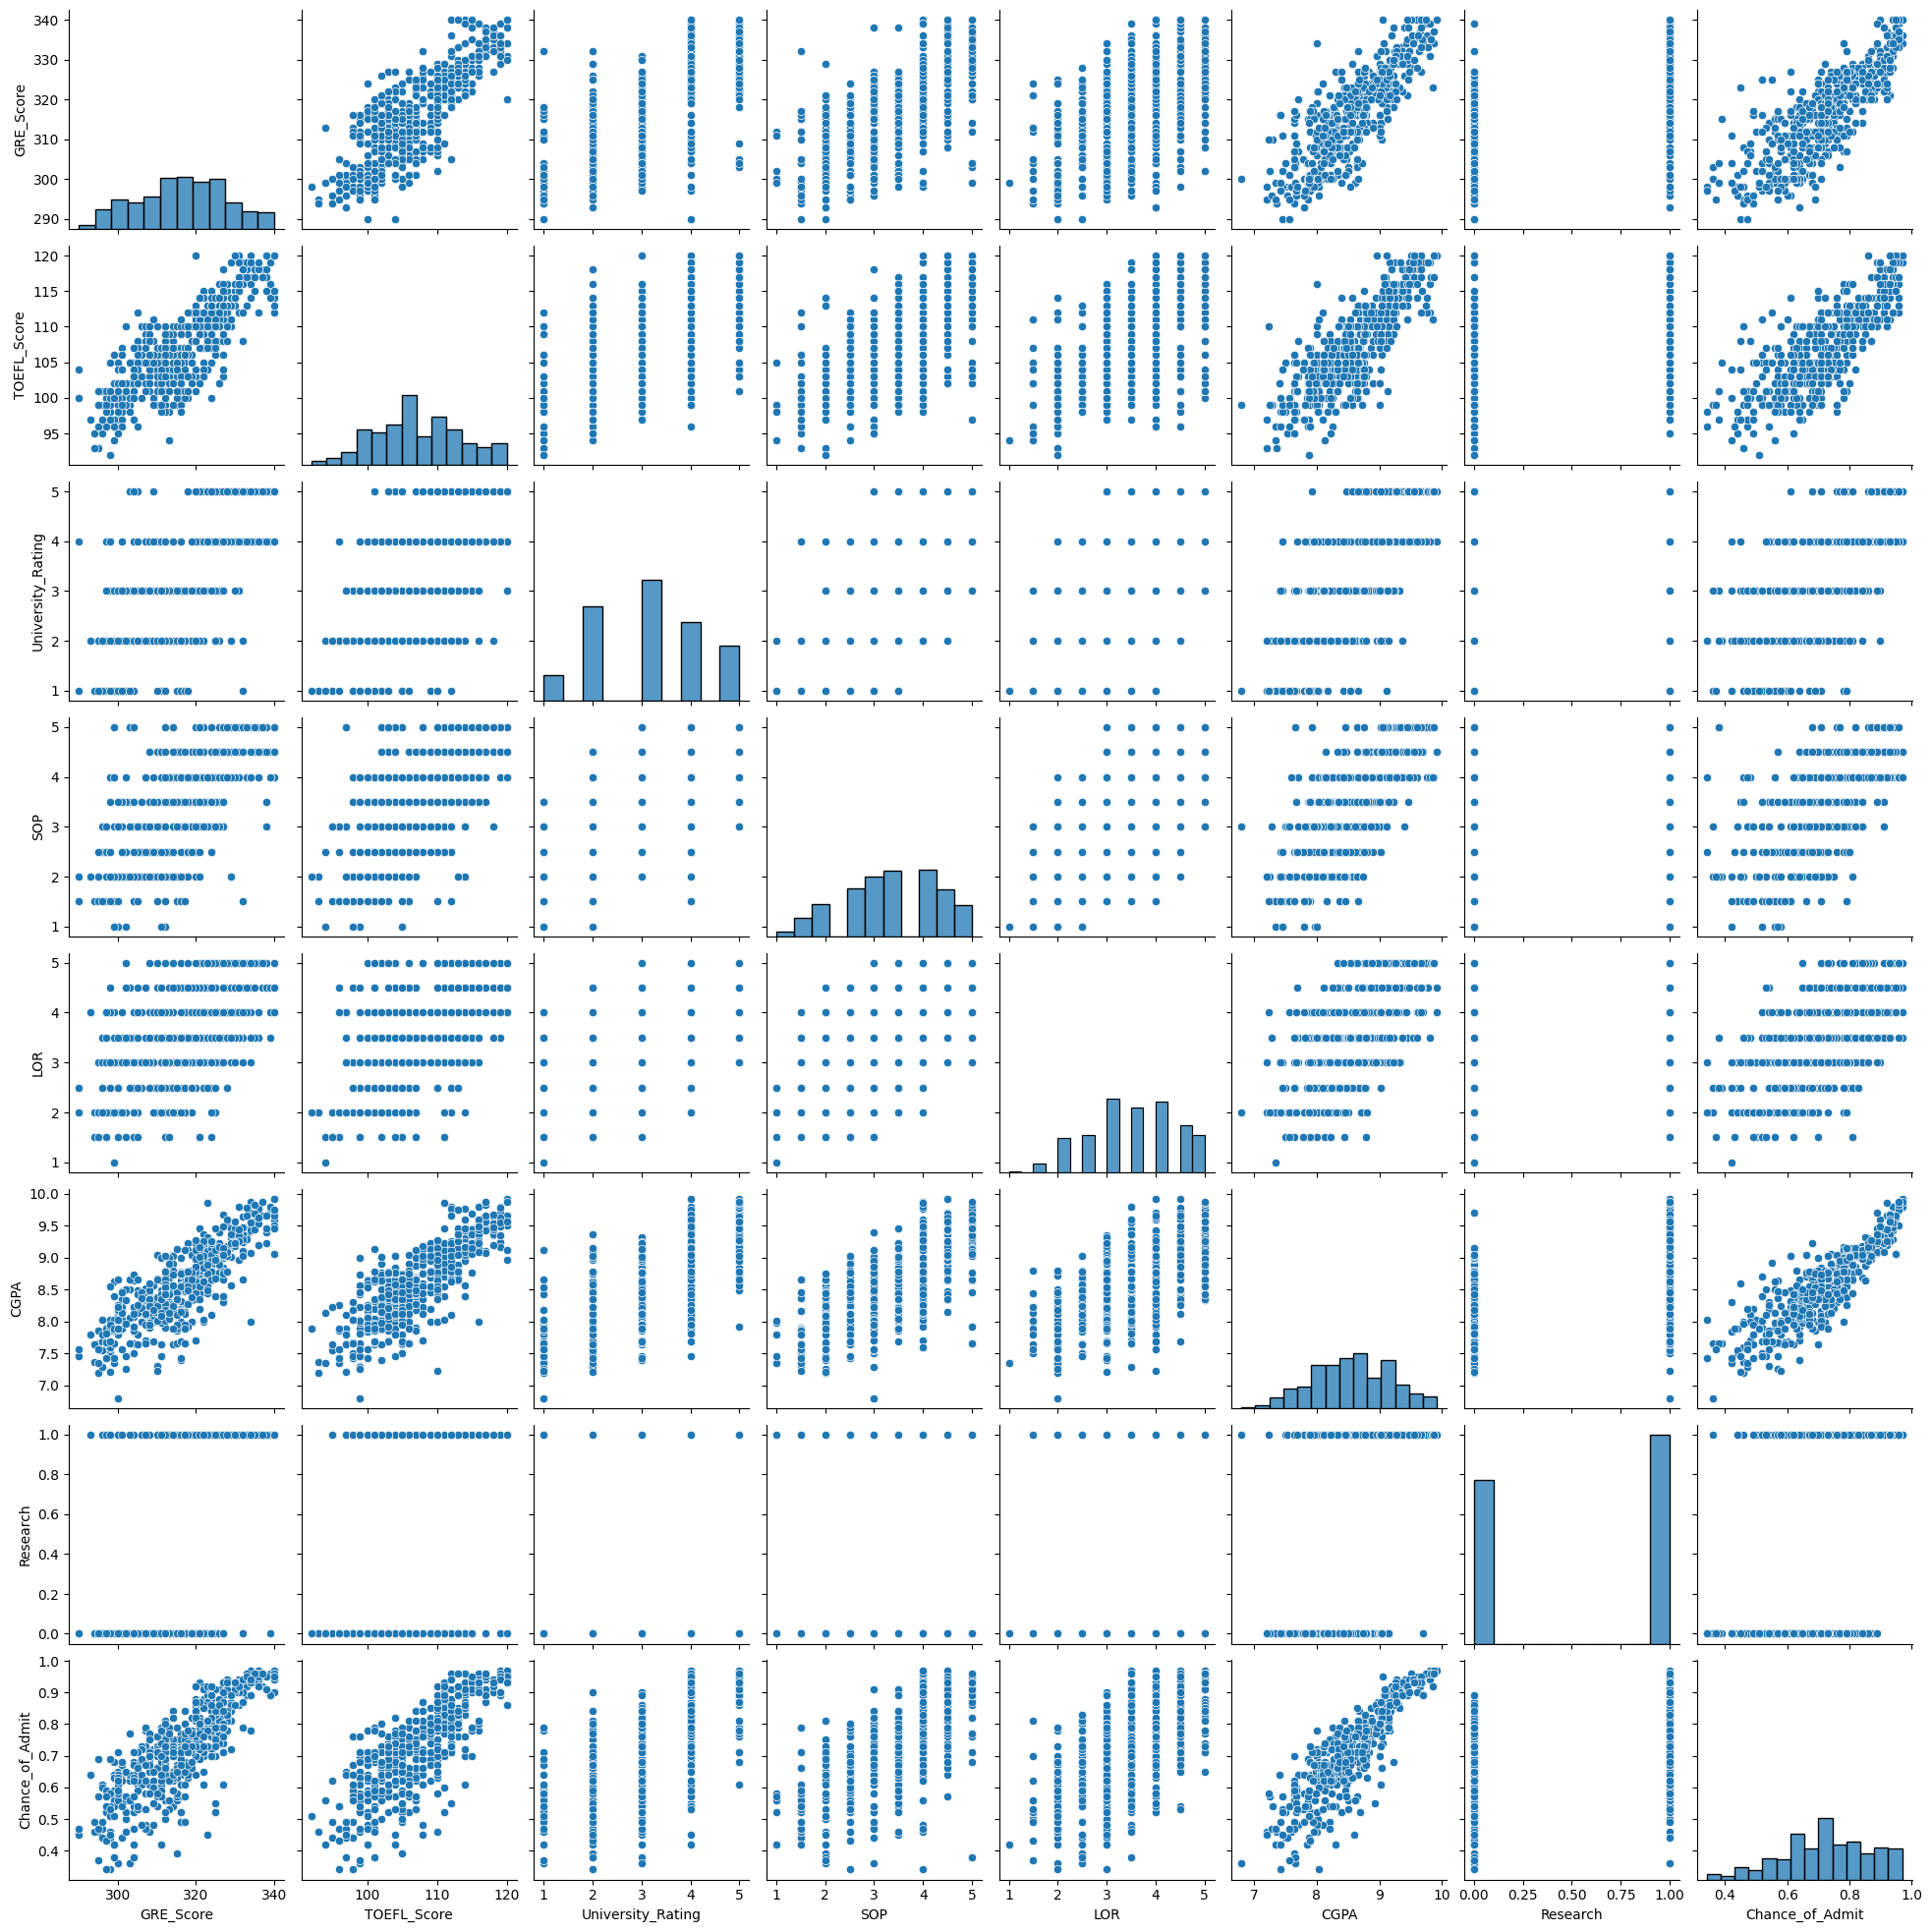

In [21]:
sns.pairplot(df)

<Axes: >

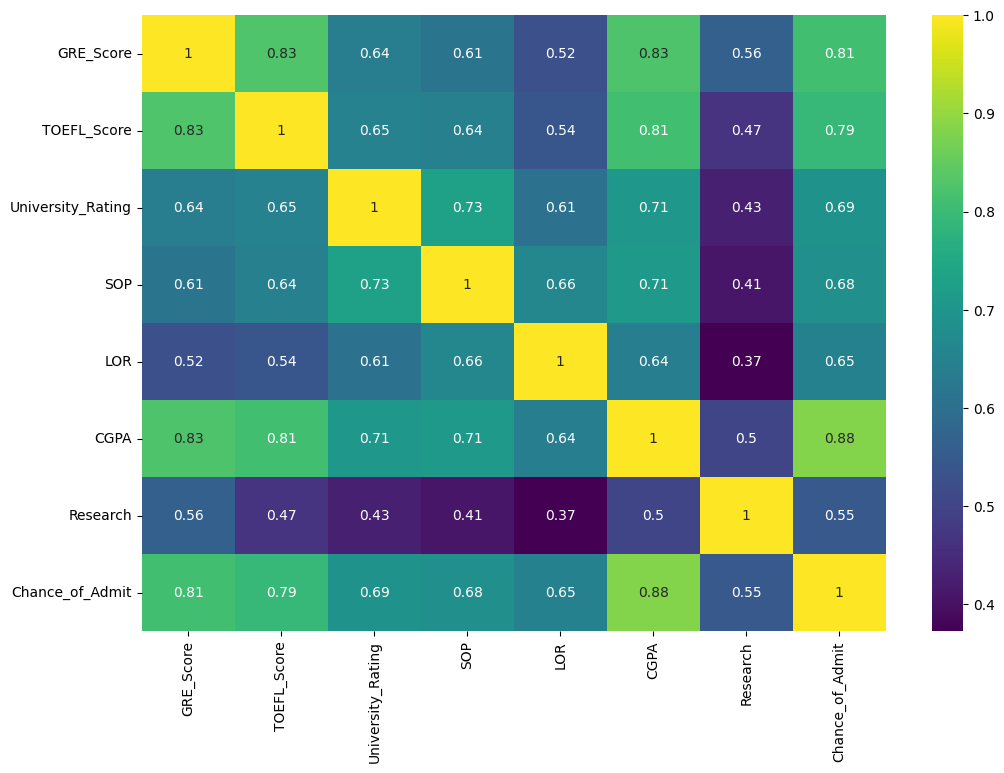

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

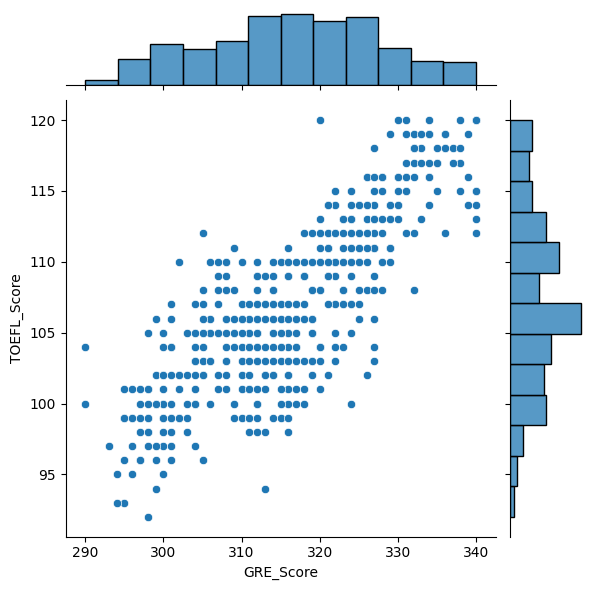

In [24]:
sns.jointplot(data =df, x = 'GRE_Score', y = 'TOEFL_Score')

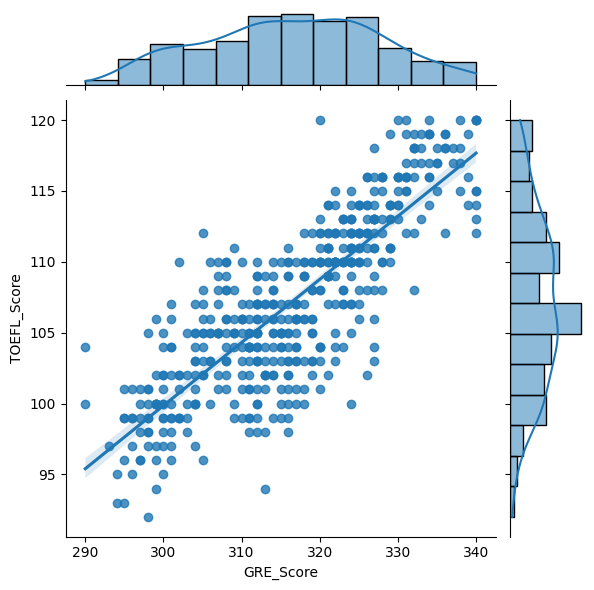

In [25]:
sns.jointplot(data =df, x = 'GRE_Score', y = 'TOEFL_Score', kind = 'reg')

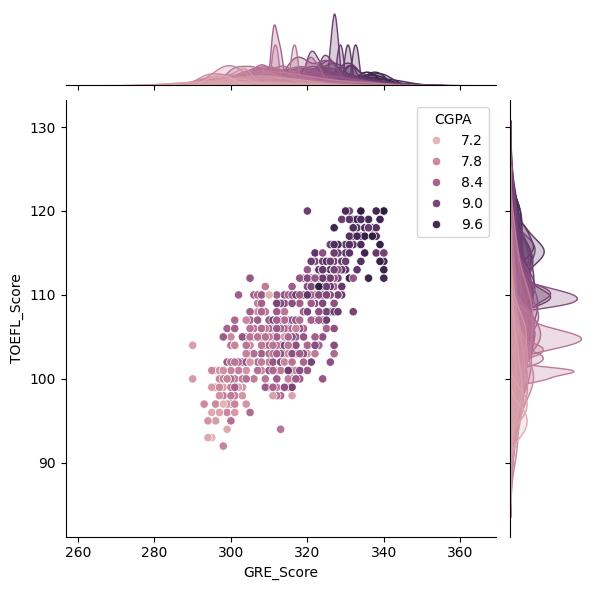

In [26]:
sns.jointplot(data =df, x = 'GRE_Score', y = 'TOEFL_Score', hue = 'CGPA')

In [28]:
X = df.drop('Chance_of_Admit', axis =1)

In [29]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [30]:
y = df['Chance_of_Admit']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

In [35]:
type(X_scaled)

numpy.ndarray

In [36]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
X_scaled_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.762146e-15,1.136868e-15,1.421085e-16,-8.526513e-17,4.263256e-17,3.119283e-15,-7.815970e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.346008e+00,-2.500419e+00,-1.850542e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-7.508077e-01,-6.899523e-01,-9.751676e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,4.679255e-02,-3.160087e-02,-9.979274e-02,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,7.557706e-01,7.913384e-01,7.755821e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.085104e+00,2.108041e+00,1.650957e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


In [38]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
  X_scaled_df, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.coef_

array([0.01879194, 0.01879032, 0.00769518, 0.00483014, 0.01430453,
       0.07160817, 0.01069454])

In [54]:
model.intercept_

0.7202782311829882

In [55]:
predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('MAE: ', mean_absolute_error(y_test, predictions))

MSE:  0.0032131036144035295
RMSE:  0.05668424485166517
MAE:  0.04085966289143848
